In [1]:
import geopandas as gpd
import shapely
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

print("Kurulum başarılı!")

Kurulum başarılı!


In [2]:
# Shapefile dosyasının tam yolunu belirtme
shapefile_path = "/Users/canyonder/Desktop/tur_adm_file/tur_admbnda_adm1_2025.shp"

# Shapefile dosyasını okuma
gdf = gpd.read_file(shapefile_path)

# Veriyi görüntüleme
print(gdf.head())

   ADM0_TR ADM0_PCODE         ADM1_TR         ADM1_EN ADM1_PCODE  \
0  Türkiye        TUR           ADANA           ADANA     TUR001   
1  Türkiye        TUR        ADIYAMAN        ADIYAMAN     TUR002   
2  Türkiye        TUR  AFYONKARAHİSAR  AFYONKARAHISAR     TUR003   
3  Türkiye        TUR            AĞRI            AGRI     TUR004   
4  Türkiye        TUR         AKSARAY         AKSARAY     TUR068   

                                            geometry  
0  POLYGON ((36.31587 38.36376, 36.31769 38.36367...  
1  POLYGON ((39.25297 38.18188, 39.25334 38.18159...  
2  POLYGON ((31.14797 39.26246, 31.15825 39.25753...  
3  POLYGON ((43.28706 40.01281, 43.29129 40.00884...  
4  POLYGON ((33.96446 39.03804, 33.96453 39.03723...  


In [3]:
# 1. Önce uygun projeksiyona çevir (UTM Zone 36N - EPSG:32636)
gdf = gdf.to_crs(epsg=32636)

# 2. Şimdi centroid hesapla (Bu adımı UTM projeksiyonunda yapıyoruz)
gdf['centroid'] = gdf.geometry.centroid

# 3. Son olarak tekrar enlem-boylama (WGS 84 - EPSG:4326) dönüştür
gdf = gdf.to_crs(epsg=4326)

# 4. Merkez noktalarını tekrar al (Bu noktalar artık enlem-boylam cinsinden)
gdf['centroid'] = gdf.geometry.centroid

# Sonuçları göster
print(gdf[['ADM1_TR', 'centroid']])

           ADM1_TR                   centroid
0            ADANA  POINT (35.58178 37.40085)
1         ADIYAMAN   POINT (38.29581 37.7934)
2   AFYONKARAHİSAR  POINT (30.65253 38.63406)
3             AĞRI   POINT (43.2499 39.55946)
4          AKSARAY  POINT (33.83994 38.44382)
..             ...                        ...
76            UŞAK  POINT (29.36172 38.57707)
77             VAN  POINT (43.58496 38.47014)
78          YALOVA  POINT (29.19516 40.59816)
79          YOZGAT  POINT (35.24769 39.65433)
80       ZONGULDAK  POINT (31.84417 41.26042)

[81 rows x 2 columns]


/var/folders/9h/5yf2jhn502s0hw7k4yd9qlz80000gn/T/ipykernel_89083/3831040244.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


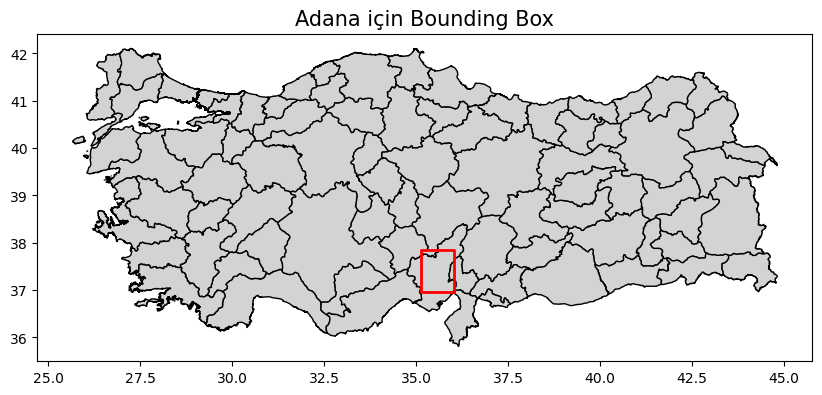

In [4]:
from shapely.geometry import box
import matplotlib.pyplot as plt
from shapely.geometry import Point

# İl sınırlarını çizdirme
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightgray', edgecolor='black')  # Şehirlerin genel haritasını çiziyoruz, sınırları siyah yapıyoruz

# Adana'nın merkez noktasını belirleyelim (enlem, boylam)
adana_centroid = Point(35.58178, 37.40085)

# Merkez noktasından belirli bir mesafede bir bounding box (kutu) oluşturma
buffer_distance = 0.45  # Derece cinsinden mesafe

# Merkez noktasından bir bounding box oluşturma
minx, miny, maxx, maxy = adana_centroid.buffer(buffer_distance).bounds
bounding_box = box(minx, miny, maxx, maxy)

# Bounding box'ı çizme
x, y = bounding_box.exterior.xy
ax.plot(x, y, color='red', linewidth=2)  # Kırmızı ile çiziyoruz

# Başlık ve eksen ayarları
ax.set_title("Adana için Bounding Box", fontsize=15)

# Görselleştirme
plt.show()


In [5]:
import pandas as pd

# CSV dosyasını oku
csv_path = "/Users/canyonder/Desktop/unitsWithCitiesAndCoordinates1.csv"
df = pd.read_csv(csv_path)

# 'CityName' sütununda Adana olanları seç
adana_df = df[df['CityName'] == 'Adana']

# Seçilen verileri kontrol et
print(f"Toplam {len(adana_df)} satır Adana şehrine ait.")
print(adana_df.head())


Toplam 1617 satır Adana şehrine ait.
                                  UnitId  \
10  06E53E6E-B896-4C90-90FD-0011A58CA0C1   
77  11C5B403-CF25-4DD9-AA26-00588E8882AB   
80  D96C2A4F-C29E-437E-A306-005992259E86   
89  037A2AE1-B98D-468A-BB70-005F07731AAA   
92  3A970060-78FC-4326-AEA5-0062A5629562   

                                UnitName CityName DistrictName  Latitude  \
10  ABDULLAH ZAFER POLATOL MUAYENEHANESİ    Adana       Ceyhan  37.02670   
77         TİMUÇİN ORCALLI MUAYENEHANESİ    Adana       Seyhan  36.99763   
80          KEVSER YEŞİLKAYA DİŞ KLİNİĞİ    Adana       Seyhan  37.00125   
89                  SERDAR OĞUZ ECZANESİ    Adana      Yüreğir  37.00793   
92         ADANA ALADAĞ DEVLET HASTANESİ    Adana       Aladağ  37.03510   

    Longitude  
10   35.81924  
77   35.32535  
80   35.32077  
89   35.36230  
92   35.31310  


In [6]:
from shapely.geometry import box, Point

# Adana'nın merkez noktası (Enlem, Boylam)
adana_centroid = Point(35.58178, 37.40085)

# Merkez noktadan belirli bir mesafede bounding box oluşturma
buffer_distance = 0.45  # Derece cinsinden mesafe (yaklaşık 50 km)

# Bounding Box sınırlarını belirleme
min_longitude, min_latitude, max_longitude, max_latitude = adana_centroid.buffer(buffer_distance).bounds

# Bounding Box nesnesi oluşturma
bounding_box = box(min_longitude, min_latitude, max_longitude, max_latitude)

# Bounding Box sınırlarını yazdırma
print(f"Adana Bounding Box - Min Longitude: {min_longitude}, Min Latitude: {min_latitude}")
print(f"Adana Bounding Box - Max Longitude: {max_longitude}, Max Latitude: {max_latitude}")


Adana Bounding Box - Min Longitude: 35.13178, Min Latitude: 36.950849999999996
Adana Bounding Box - Max Longitude: 36.031780000000005, Max Latitude: 37.85085


In [7]:
import pandas as pd
from shapely.geometry import Point, box

# CSV dosyasını oku
csv_path = "/Users/canyonder/Desktop/unitsWithCitiesAndCoordinates1.csv"
df = pd.read_csv(csv_path)

# 'CityName' sütununda Adana olanları seç
adana_df = df[df['CityName'] == 'Adana'].copy()  # Kendi kopyasını oluşturduk

# Adana Bounding Box sınırlarını belirleme 
min_longitude, min_latitude = 35.13178, 36.950849999999996  
max_longitude, max_latitude = 36.031780000000005, 37.85085 

# Bounding box oluşturma
bounding_box = box(min_longitude, min_latitude, max_longitude, max_latitude)

# Adana'daki her nokta için Point nesnesi oluştur ve ekrana yazdır
adana_df["Point"] = adana_df.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)



# Bounding box içinde olup olmadığını kontrol et
adana_df["inside_bounding_box"] = adana_df.apply(
    lambda row: bounding_box.contains(row["Point"]), axis=1
)

# Bounding box içinde olanları ve dışında kalanları ayır
inside_adana = adana_df[adana_df["inside_bounding_box"] == True]  # İçinde olanlar
outside_adana = adana_df[adana_df["inside_bounding_box"] == False]  # Dışında olanlar

# Sonuçları yazdır
print(f"\nAdana'daki toplam kayıt sayısı: {len(adana_df)}")
print(f"Bounding box içinde olan kayıt sayısı: {len(inside_adana)}")
print(f"Bounding box dışında olan kayıt sayısı: {len(outside_adana)}")

# Bounding box dışında kalan verilerden ilk 5 hatalı veriyi yazdır
print("\nİlk 5 hatalı veri (bounding box dışında kalanlar):")
print(outside_adana.head())

# Bounding box dışında kalan verileri kaydet 
outside_adana.to_csv("outside_adana_bounding_box.csv", index=False)


Adana'daki toplam kayıt sayısı: 1617
Bounding box içinde olan kayıt sayısı: 1501
Bounding box dışında olan kayıt sayısı: 116

İlk 5 hatalı veri (bounding box dışında kalanlar):
                                    UnitId  \
559   150A7732-150F-42CE-8E72-025F3ADFFF3A   
1205  E229A6D9-A588-43B7-B0AE-0540B6C1C77C   
1695  F81FC2CB-F4CE-4FE0-B29E-074EA6FD8C2C   
2085  3B2DB0D8-0EA0-49F2-BD74-08F2B8285B7A   
2152  A4E8B9BA-5DF5-4E8E-8166-094C38F1DBC5   

                                              UnitName CityName  DistrictName  \
559                                     KILIÇ ECZANESİ    Adana       Karataş   
1205          ADANA KARATAŞ TUZLA AİLE SAĞLIĞI MERKEZİ    Adana       Karataş   
1695  ÖZEL BULUT DENTAL AĞIZ DİŞ SAĞLIĞI POLİKLİNİĞİ 2    Adana      Çukurova   
2085                                    GÜVEN ECZANESİ    Adana      Çukurova   
2152                          YELİZ AKAN MERİTA CLİNİC    Adana  ADANA MERKEZ   

      Latitude  Longitude                       Point  ins